# Project 3.1 - EDA

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Train test splitting from sklearn
from sklearn.model_selection import train_test_split

##Stats model for linreg
import statsmodels.api as sm
import statsmodels.tools

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [126]:
df=pd.read_csv("life_expectancy_data_updated.csv")

### Note:
We originally used the older dataset, some EDA content was based on that & no longer relevent
Some of this work is still present in this workbook

# Exploring the data

In [127]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [128]:
df.shape

(2864, 21)

In [129]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [130]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [131]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


# Cleaning

### Clean column headers
There was needed cleaning to the column headers to the older dataset.
This dataset does not require that but we have kept it in for proof of process.

In [132]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [134]:
df.columns = (df.columns
              .str.replace('^\s','',regex=True)
              .str.replace('\s$','',regex=True)
              .str.replace('\s\s',' ',regex=True)
              .str.replace('\s','_',regex=True)
              .str.lower()
              .copy()
              )

In [135]:
df.columns

Index(['country', 'region', 'year', 'infant_deaths', 'under_five_deaths',
       'adult_mortality', 'alcohol_consumption', 'hepatitis_b', 'measles',
       'bmi', 'polio', 'diphtheria', 'incidents_hiv', 'gdp_per_capita',
       'population_mln', 'thinness_ten_nineteen_years',
       'thinness_five_nine_years', 'schooling', 'economy_status_developed',
       'economy_status_developing', 'life_expectancy'],
      dtype='object')

### Null check
There are no nulls in this dataset.
The older data, where there were null values, we had taken steps to fill or drop. That's not needed with this data.

In [136]:
df.isnull().sum().sort_values(ascending=False) ## No nulls

country                        0
diphtheria                     0
economy_status_developing      0
economy_status_developed       0
schooling                      0
thinness_five_nine_years       0
thinness_ten_nineteen_years    0
population_mln                 0
gdp_per_capita                 0
incidents_hiv                  0
polio                          0
region                         0
bmi                            0
measles                        0
hepatitis_b                    0
alcohol_consumption            0
adult_mortality                0
under_five_deaths              0
infant_deaths                  0
year                           0
life_expectancy                0
dtype: int64

# Corrolation Checks

In [137]:
df.corr()

C:\Users\44796\AppData\Local\Temp\ipykernel_15400\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,infant_deaths,under_five_deaths,adult_mortality,alcohol_consumption,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,gdp_per_capita,population_mln,thinness_ten_nineteen_years,thinness_five_nine_years,schooling,economy_status_developed,economy_status_developing,life_expectancy
year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
hepatitis_b,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
bmi,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


C:\Users\44796\AppData\Local\Temp\ipykernel_15400\707490333.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,annot=True)


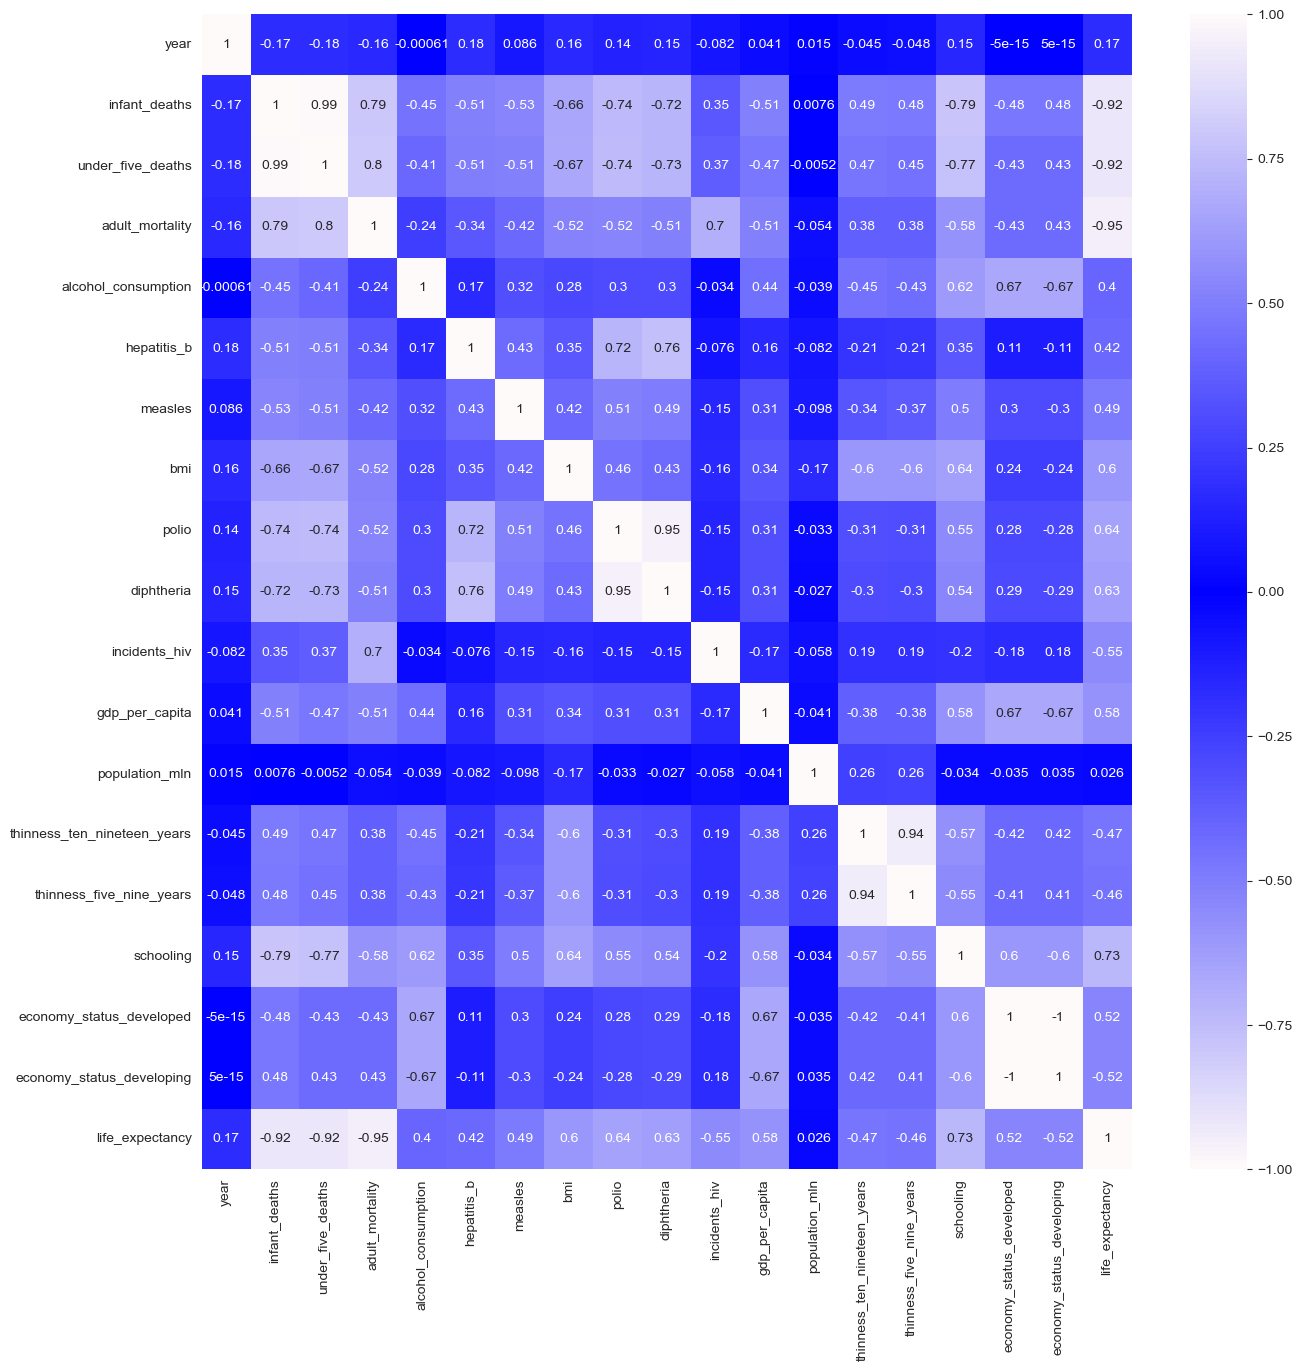

In [138]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('', ['snow', 'blue', 'snow'])

plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(),cmap=cmap,annot=True)

plt.show()

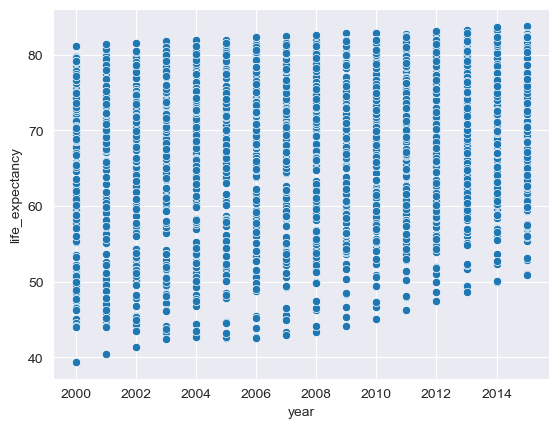

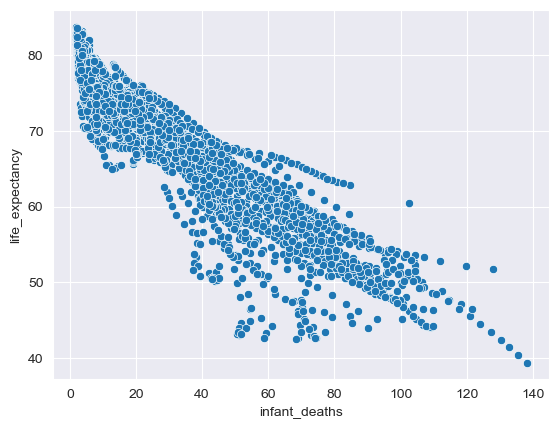

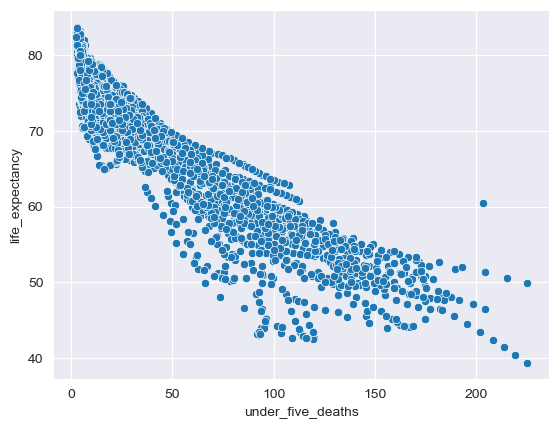

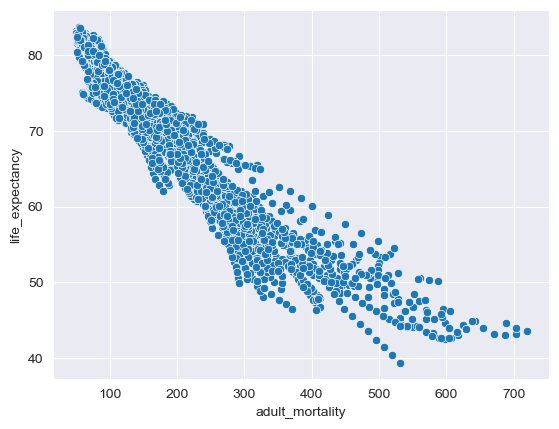

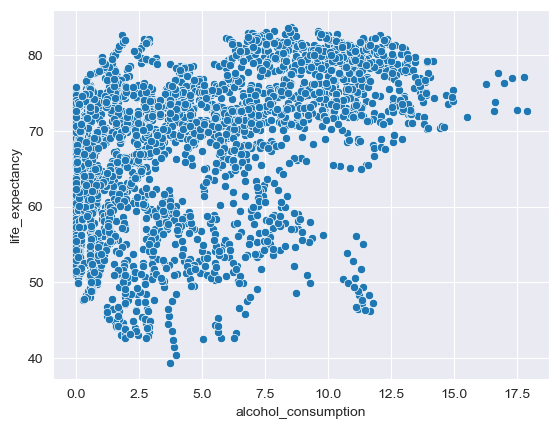

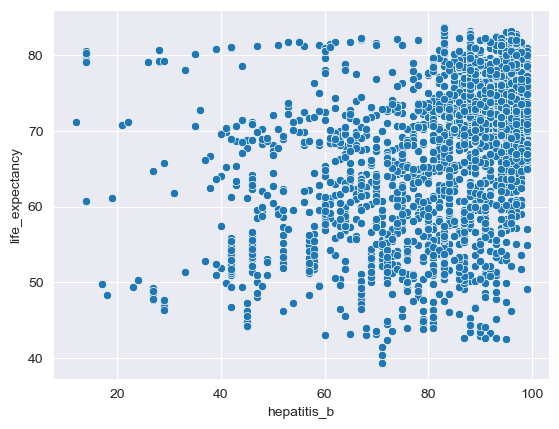

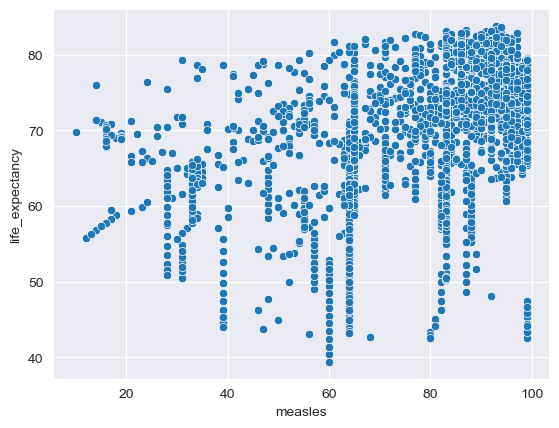

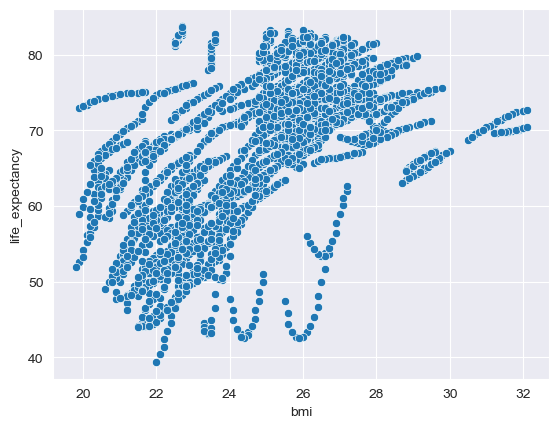

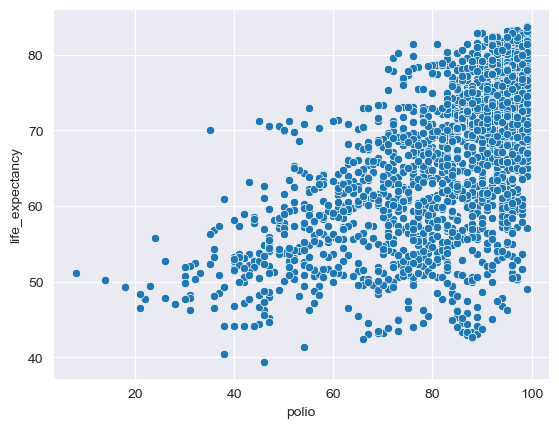

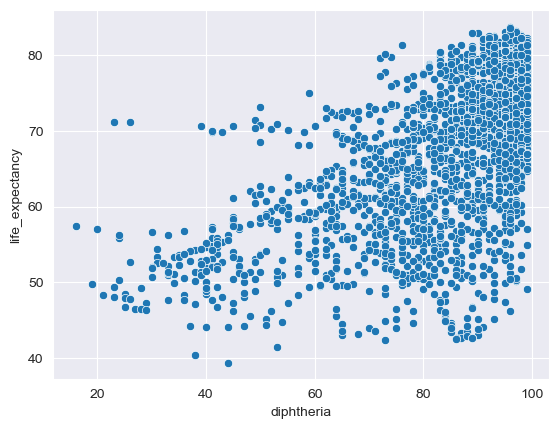

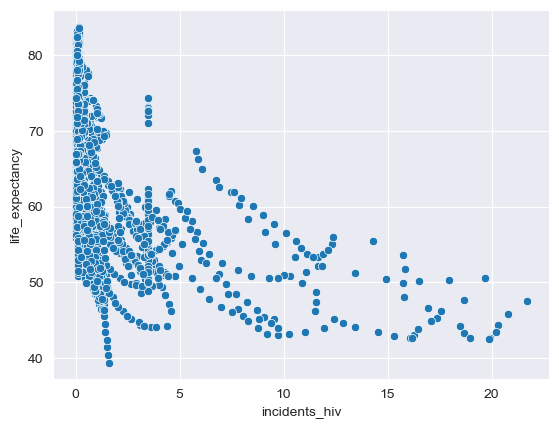

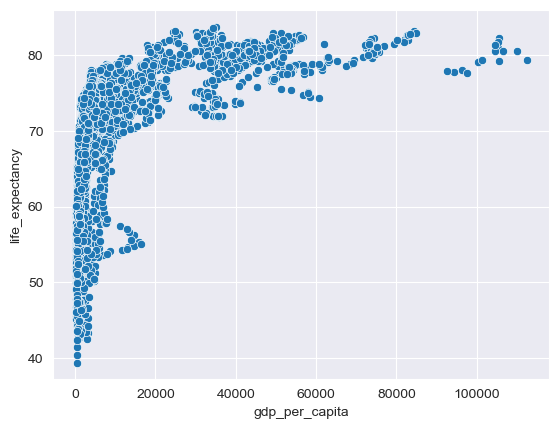

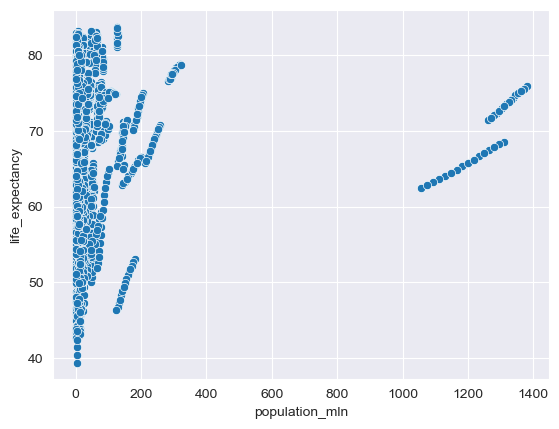

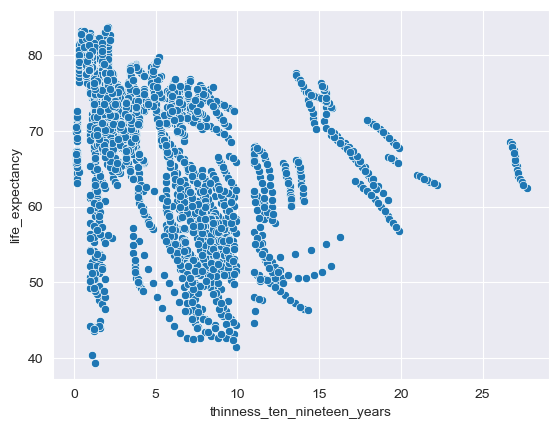

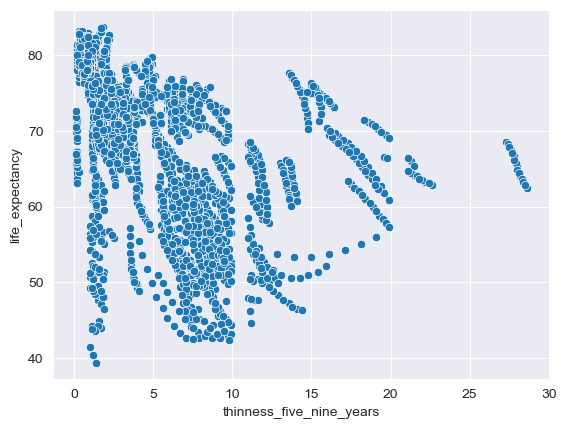

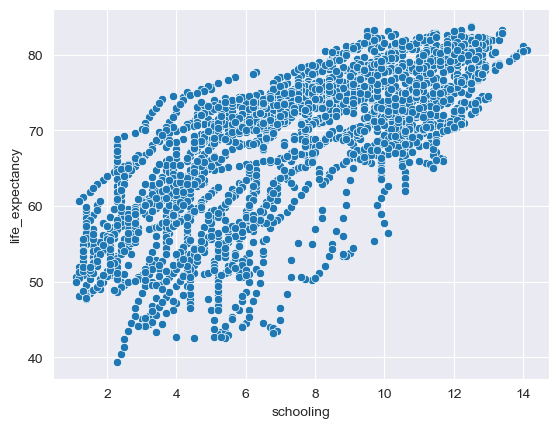

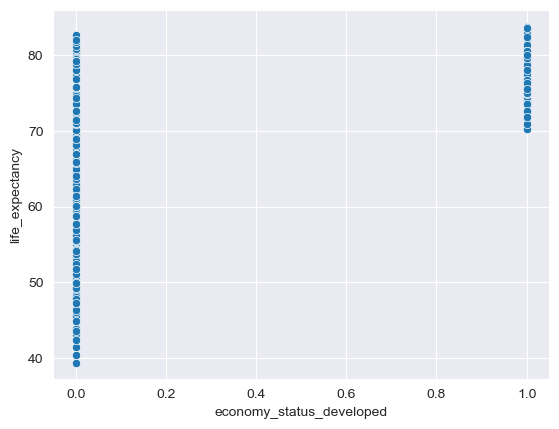

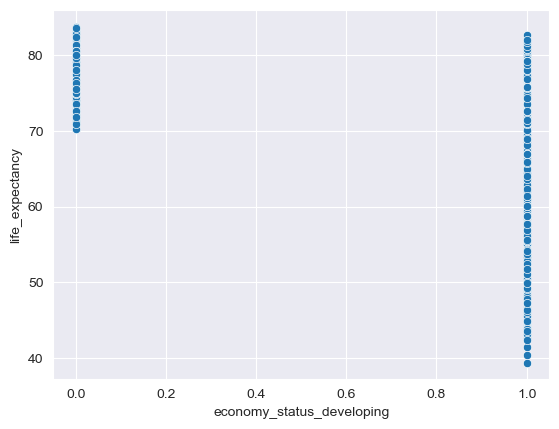

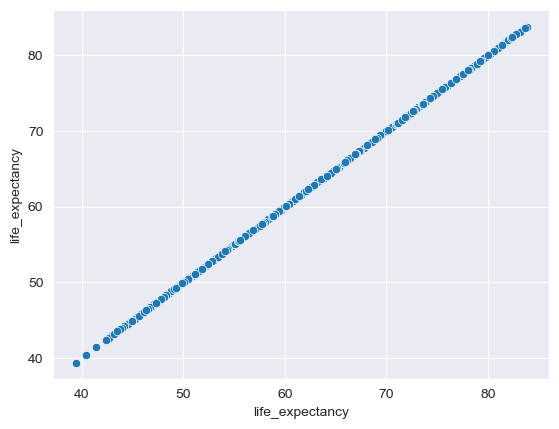

In [168]:
for column in df.iloc[:,2:]:
    sns.scatterplot(x= column,
                    y= 'life_expectancy',
                    data = df)

    plt.show()

### Independant / Feature insights
Just a few visualisations to look at the dispersions of different Features

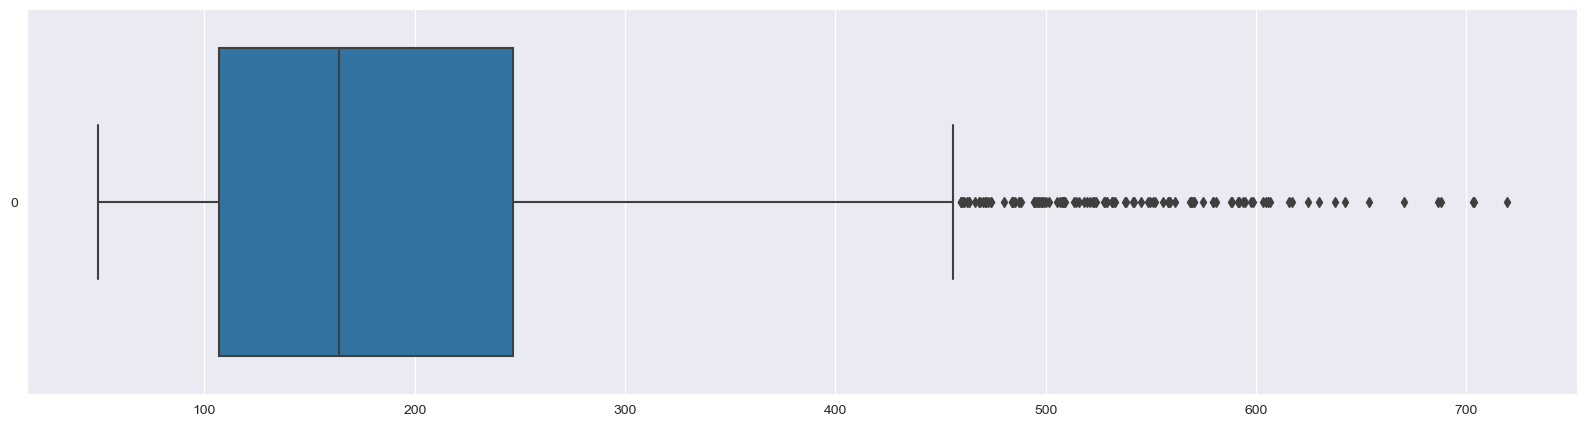

In [169]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['adult_mortality'],
            orient = 'h')
plt.show()

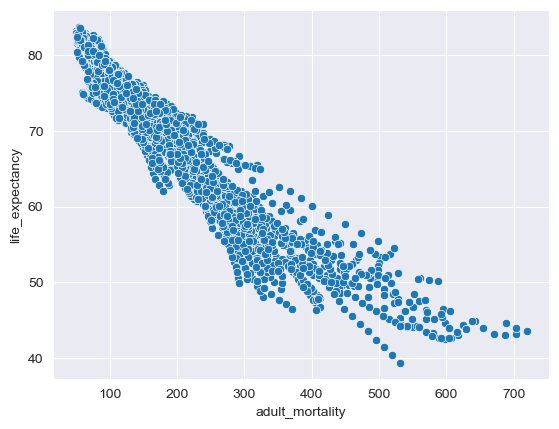

In [170]:
sns.scatterplot(x='adult_mortality',
                y = 'life_expectancy',
                data = df)

plt.show()

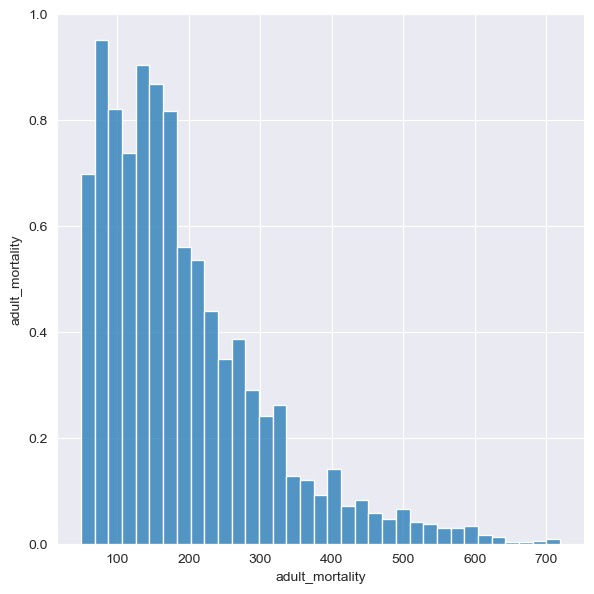

In [171]:
sns.pairplot(df[['adult_mortality']], height = 6)
plt.show()